In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [3]:
df.drop(columns=['day','month','year'],axis=1,inplace=True)

In [4]:
# Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [5]:
# sepration
X = df.drop('FWI',axis=1)
y = df['FWI']

In [6]:
# train_test_split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [7]:
# feature selection
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,-0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,-0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,-0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,-0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,-0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,-0.188837


<Axes: >

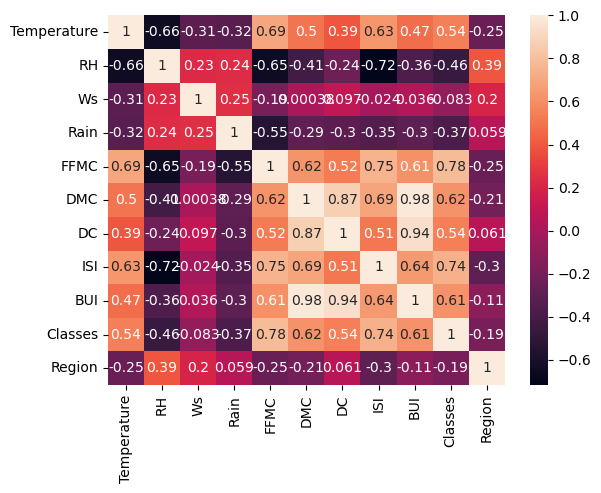

In [9]:
# check for multi-collinearity

corr = X_train.corr()
sns.heatmap(corr,annot=True)


In [10]:
# drop multi-collinear features

def corr_fn(dataset,threshold=0.85):
    col_corr = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs (corr_matrix.iloc[i,j])>threshold:
                colnames= corr_matrix.columns[i]
                col_corr.add(colnames)
    return col_corr

In [11]:
corr_fn(X_train,0.85)

{'BUI', 'DC'}

In [12]:
X_train.drop(columns=['BUI','DC'],inplace=True)
X_test.drop(columns=['BUI','DC'],inplace=True)

In [14]:
# feature scaling or Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Axes: >

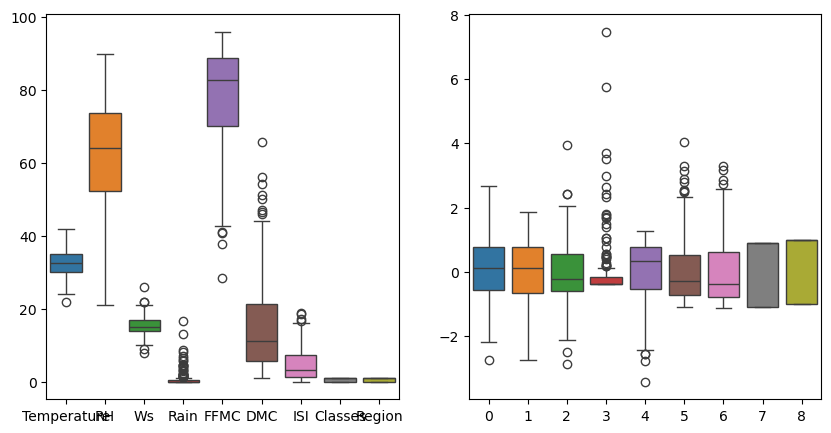

In [20]:
# comparison of before & after Standardization

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)

plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)

MAE : 0.5468236465249986
R sqr: 0.9847657384266951


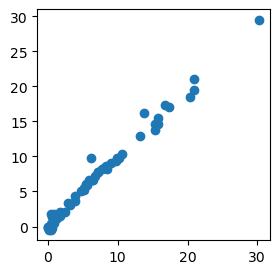

In [27]:
# model training

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

model = LinearRegression()
model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("MAE :",mae)
print("R sqr:",score)

plt.figure(figsize=(3,3))
plt.scatter(y_test,y_pred)

MAE : 1.8822353634896005
R sqr: 0.8753460589519703


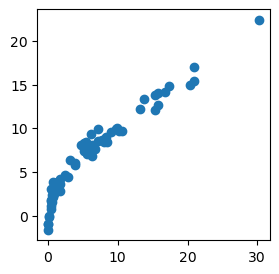

In [28]:
# controlling overfitting

from sklearn.linear_model import ElasticNet          # can use Lasso & Ridge seperatly

e_model = ElasticNet()
e_model.fit(X_train_scaled,y_train)

y_pred = e_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("MAE :",mae)
print("R sqr:",score)

plt.figure(figsize=(3,3))
plt.scatter(y_test,y_pred)

MAE : 0.619970115826343
R sqr: 0.9820946715928275


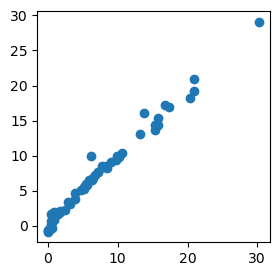

In [29]:
# cross validation 

from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv=5)

lassocv.fit(X_train_scaled,y_train)

y_pred_lassocv = lassocv.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred_lassocv)
score = r2_score(y_test,y_pred_lassocv)

print("MAE :",mae)
print("R sqr:",score)

plt.figure(figsize=(3,3))
plt.scatter(y_test,y_pred_lassocv)

MAE : 0.6575946731430898
R sqr: 0.9820946715928275


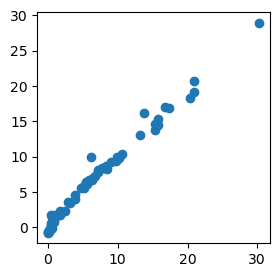

In [30]:
# cross validation 

from sklearn.linear_model import ElasticNetCV

elcv = ElasticNetCV(cv=5)

elcv.fit(X_train_scaled,y_train)

y_pred_elcv = elcv.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred_elcv)
score = r2_score(y_test,y_pred_lassocv)

print("MAE :",mae)
print("R sqr:",score)

plt.figure(figsize=(3,3))
plt.scatter(y_test,y_pred_elcv)